In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [17]:
# 1) Importez vos données et effectuez la phase d'exploration de base des données

data_clustering = pd.read_csv('Credit_card_dataset.csv')

# Affichages des premières lignes
data_clustering.head()

# Affichage des informations générales
inf = data_clustering.info()
inf

# Rapport de profilage pandas

profile = ProfileReport(data_clustering, title='Pandas Profiling Report')

# Affichage du rapport

profile.to_notebook_iframe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# 2) Effectuer les étapes de préparation des données nécessaires (gestion des valeurs corrompues et manquantes, codage des données, gestion des valeurs aberrantes...)

# Vérifier les valeurs manquantes
print(data_clustering.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [35]:
# Remplacer les valeurs manquantes par la moyenne
mean_value = data_clustering['CREDIT_LIMIT'].mean()
data_clustering['CREDIT_LIMIT'] = data_clustering['CREDIT_LIMIT'].fillna(mean_value)

In [37]:
# codage des données 

# Initialiser le label encoder
label_encoder = LabelEncoder()

In [39]:
# Appliquer le label encoding
data_clustering['Category_encoded'] = label_encoder.fit_transform(data_clustering['CUST_ID'])

In [41]:
# 3) Effectuez un regroupement hiérarchique pour identifier les regroupements inhérents à vos données.

# Préparation des données : sélection des fonctionnalités
X = data_clustering[['PURCHASES', 'CREDIT_LIMIT']]

In [43]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Étape 1 : Regroupement hiérarchique
linked = linkage(X_scaled, method='ward')

In [47]:
# Étape 3 : Définir les clusters
# Choisir un seuil pour le regroupement
threshold = 5  
clusters = fcluster(linked, threshold, criterion='distance')

In [49]:
# Ajouter les clusters au DataFrame
data_clustering['Cluster'] = clusters

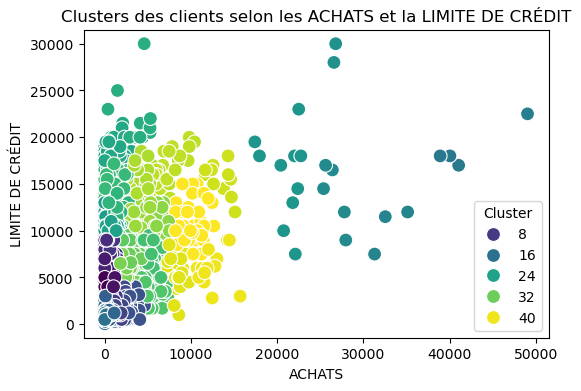

In [51]:
# Étape 4 : Visualiser les clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data_clustering, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters des clients selon les ACHATS et la LIMITE DE CRÉDIT')
plt.xlabel('ACHATS')
plt.ylabel('LIMITE DE CRÉDIT')
plt.legend(title='Cluster')
plt.show()

In [53]:
# 4) Effectuez un clustering partitionnel à l'aide de l'algorithme K-means. Ensuite, tracez les clusters

# Étape 1 : Déterminer le nombre optimal de clusters
# Méthode du coude
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [55]:
# Étape 2 : Appliquer K-means avec le nombre de clusters choisi
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

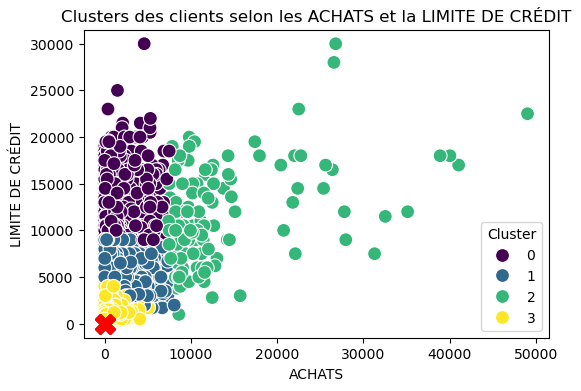

In [57]:
# Étape 3 : Visualiser les clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data_clustering, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters des clients selon les ACHATS et la LIMITE DE CRÉDIT')
plt.xlabel('ACHATS')
plt.ylabel('LIMITE DE CRÉDIT')
plt.legend(title='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centres des clusters')
plt.show()

In [59]:
# 5) Trouvez la meilleure valeur k et tracez à nouveau les clusters.
#Appliquer K-means avec le nombre de clusters choisi
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

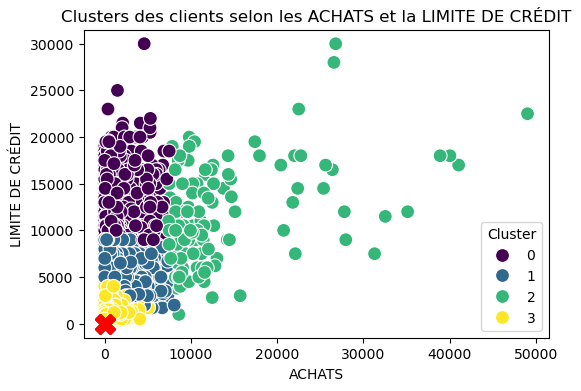

In [61]:
#  Visualiser les clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data_clustering, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters des clients selon les ACHATS et la LIMITE DE CRÉDIT')
plt.xlabel('ACHATS')
plt.ylabel('LIMITE DE CRÉDIT')
plt.legend(title='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centres des clusters')
plt.show()

In [63]:
# 6) Interpréter les résultats

print("Visualisation des clusters : Les graphiques de dispersion montrent comment les clients sont regroupés selon leurs comportements d'achat (ACHATS) et leur limite de crédit (LIMITE DE CRÉDIT). Les différents clusters représentent des groupes de clients ayant des comportements similaires en termes d'achats et de limites de crédit.\n")
      

print("Analyse des Centroïdes : Chaque cluster a un centre (centroïde) qui représente la moyenne des caractéristiques des clients dans ce cluster. L'emplacement des centroïdes permet de comprendre les caractéristiques générales des clients dans chaque groupe. Par exemple : Un cluster peut avoir un centroïde avec des valeurs élevées pour les ACHATS et la LIMITE DE CRÉDIT, indiquant des clients à fort potentiel. Un autre cluster peut avoir des valeurs plus faibles, indiquant des clients à faible activité ou à faible capacité de crédit.\n")

print("Interprétation des Clusters : Cluster à fort potentiel : Clients avec des achats élevés et des limites de crédit élevées. Ces clients peuvent être ciblés pour des offres spéciales ou des produits premium. Cluster à faible engagement : Clients avec des achats faibles et des limites de crédit basses. Cela peut indiquer qu'ils n'utilisent pas leur carte de manière optimale ou qu'ils pourraient être en difficulté financière. Cluster intermédiaire : Clients avec des comportements d'achat et des limites de crédit modérées. Cela peut représenter des opportunités pour augmenter l'engagement ou la limite de crédit.")

Visualisation des clusters : Les graphiques de dispersion montrent comment les clients sont regroupés selon leurs comportements d'achat (ACHATS) et leur limite de crédit (LIMITE DE CRÉDIT). Les différents clusters représentent des groupes de clients ayant des comportements similaires en termes d'achats et de limites de crédit.

Analyse des Centroïdes : Chaque cluster a un centre (centroïde) qui représente la moyenne des caractéristiques des clients dans ce cluster. L'emplacement des centroïdes permet de comprendre les caractéristiques générales des clients dans chaque groupe. Par exemple : Un cluster peut avoir un centroïde avec des valeurs élevées pour les ACHATS et la LIMITE DE CRÉDIT, indiquant des clients à fort potentiel. Un autre cluster peut avoir des valeurs plus faibles, indiquant des clients à faible activité ou à faible capacité de crédit.

Interprétation des Clusters : Cluster à fort potentiel : Clients avec des achats élevés et des limites de crédit élevées. Ces clients pe